Labels: [1 1 1 0 0 0]
Centroid: [[10.  2.]
 [ 1.  2.]]


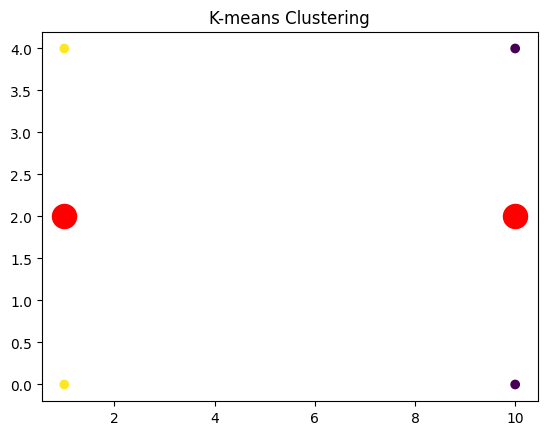

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Contoh data
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

# Membuat model K-means
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# Hasil klasterisasi
print("Labels:", kmeans.labels_)
print("Centroid:", kmeans.cluster_centers_)

# Visualisasi
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title("K-means Clustering")
plt.show()

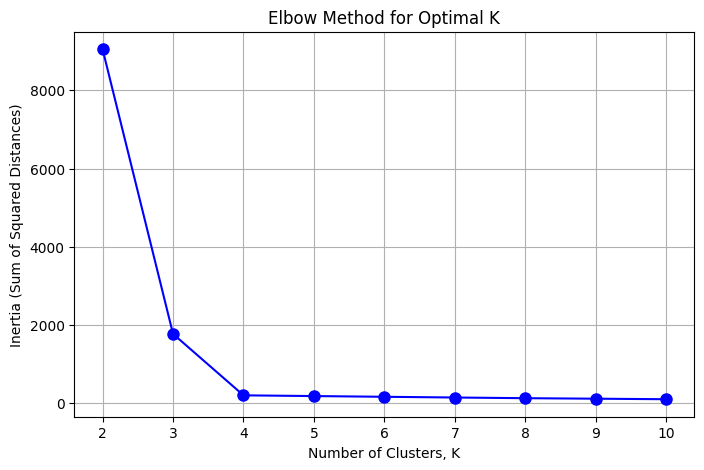

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Step 1: Membuat dataset simulasi
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Step 2: Menentukan jumlah klaster optimal menggunakan Elbow Method
inertias = []
K_values = range(2, 11)  # Nilai K dari 2 hingga 10

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertias, 'bo-', markersize=8)
plt.xlabel('Number of Clusters, K')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

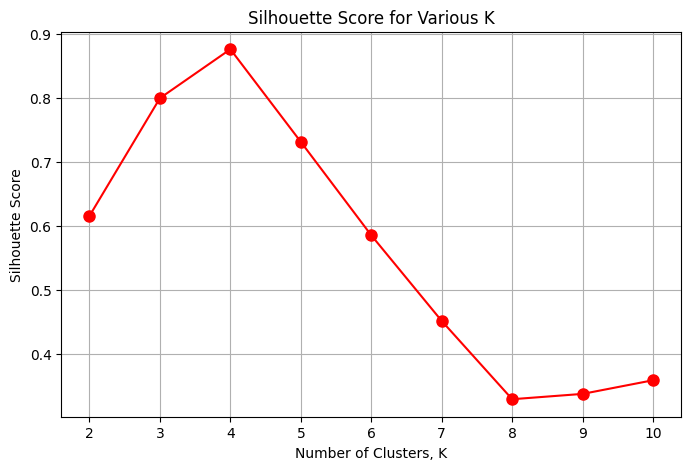

0.6154853461594691
0.7992801073745723
0.8756469540734731
0.731072214224266
0.5853234594447899
0.4516664221324645
0.3295595675242826
0.3378843662995733
0.35918605475746834


In [16]:
# Step 3: Mengevaluasi hasil klasterisasi menggunakan Silhouette Score
silhouette_scores = []

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_values, silhouette_scores, 'ro-', markersize=8)
plt.xlabel('Number of Clusters, K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Various K')
plt.grid(True)
plt.show()

for i in silhouette_scores:
    print(i)

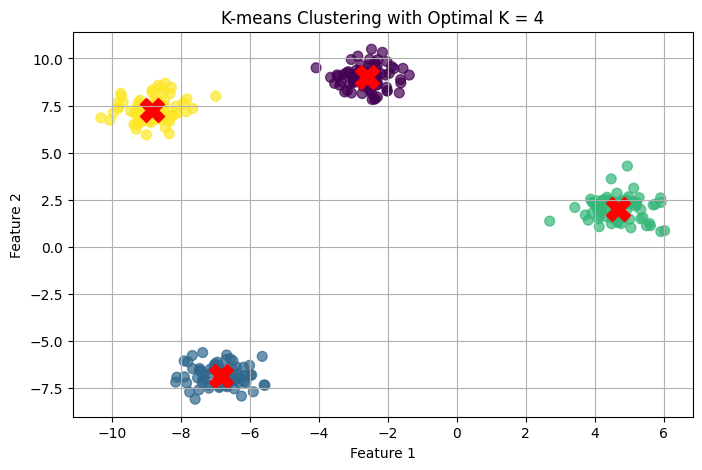

In [17]:
# Menentukan K optimal berdasarkan nilai silhouette score tertinggi
optimal_k = K_values[np.argmax(silhouette_scores)]

# Step 4: Melakukan klasterisasi dengan K optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(X)

# Visualisasi hasil klasterisasi
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_optimal, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title(f"K-means Clustering with Optimal K = {optimal_k}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

Labels: [ 0  0  0  1  1 -1]


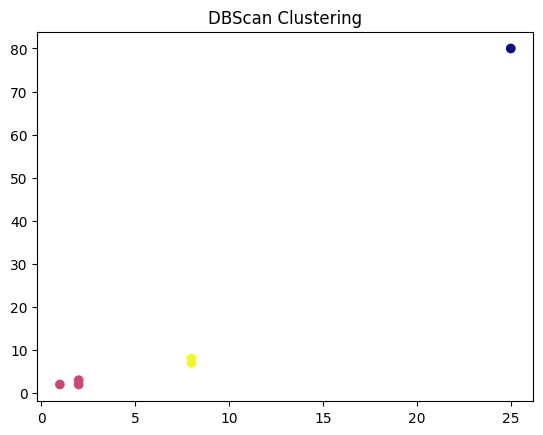

In [18]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Contoh data
X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])

# Membuat model DBScan
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(X)

# Hasil klasterisasi
print("Labels:", dbscan.labels_)

# Visualisasi
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='plasma')
plt.title("DBScan Clustering")
plt.show()

In [19]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.datasets import make_blobs

# Membuat data contoh
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# K-means
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(X)

# DBScan
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Metrik Evaluasi K-means
print("K-means Silhouette Score:", silhouette_score(X, kmeans_labels))
print("K-means Davies-Bouldin Index:", davies_bouldin_score(X, kmeans_labels))
print("K-means Adjusted Rand Index:", adjusted_rand_score(y_true, kmeans_labels))

# Metrik Evaluasi DBScan
print("DBScan Silhouette Score:", silhouette_score(X, dbscan_labels))
print("DBScan Davies-Bouldin Index:", davies_bouldin_score(X, dbscan_labels))
print("DBScan Adjusted Rand Index:", adjusted_rand_score(y_true, dbscan_labels))

K-means Silhouette Score: 0.6819938690643478
K-means Davies-Bouldin Index: 0.4375640078237839
K-means Adjusted Rand Index: 1.0
DBScan Silhouette Score: 0.58977292182092
DBScan Davies-Bouldin Index: 0.6221146794614193
DBScan Adjusted Rand Index: 0.7122232916265641
